<a href="https://colab.research.google.com/github/Ebere2425/711-Take-Home-Test/blob/main/MnistGAN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adversarial Networks (GANs) Implementation with Keras

Generative Adversarial Networks (GANs) are deep learning architectures that consist of two neural networks, the generator and the discriminator, that compete against each other. The generator creates realistic-looking fake data, while the discriminator tries to distinguish between real and fake data. Through this competition, the generator improves its ability to create highly realistic fake data.

My implementation of GAN using Keras in Python, using fully connected dense layers for both the generator and discriminator. The code also demonstrates how the trained model can be used to generate realistic looking fake handwritten digits.

In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt
import numpy as np

# Generator Network

The provided code defines a generator network for a Generative Adversarial Network (GAN).

* 		Generator Function:
    * The code defines a function named build_generator responsible for creating the generator network.
* 		Noise Shape:
    * The latent noise vector's shape is set to (100,), indicating a 1D array of size 100. This vector serves as the input to the generator, producing synthetic images.
* 		Generator Architecture:
    * The generator network is constructed using Sequential layers.
    * It consists of several Dense layers with increasing units, followed by LeakyReLU activation functions and BatchNormalization. This architecture is commonly used in GANs.
    * The final Dense layer has the size equal to the product of the image shape, and it uses the tanh activation function to ensure the generated values are within the range [-1, 1].
    * The Reshape layer reshapes the output to match the specified img_shape.
* 		Model Summary:
    * The model.summary() method is called to display a summary of the generator's architecture.
* 		Input and Output:
    * The noise vector is defined as an Input layer, and the generated image is obtained by passing the noise through the generator model.


In [ ]:

#Define input image dimensions.
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

#Given input of noise (latent) vector, the Generator produces an image.
def build_generator():

    noise_shape = (100,) #1D array of size 100 (latent vector / noise)

#Define your generator network
#Here we are only using Dense layers.

    model = Sequential()

    model.add(Dense(256, input_shape=noise_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

    model.summary()

    noise = Input(shape=noise_shape)
    img = model(noise)    #Generated image

    return Model(noise, img)

In [ ]:
modelg = build_generator()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               25856     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_6 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization_7 (Bat  (None, 512)               2048      
 chNormalization)                                     

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

NameError: name 'model' is not defined

# Discriminator Network

* The provided code defines a discriminator network for a Generative Adversarial Network (GAN)

* 		Discriminator Function:
    * The code defines a function named build_discriminator responsible for creating the discriminator network.
* 		Discriminator Architecture:
    * The discriminator network is constructed using Sequential layers.
    * It starts with a Flatten layer to transform the input image shape into a 1D array.
    * The subsequent Dense layers progressively reduce the number of units, with LeakyReLU activation functions. The last Dense layer has a single unit with a sigmoid activation function, performing binary classification to determine the likelihood of the input image being real.
* 		Model Summary:
    * The model.summary() method is called to display a summary of the discriminator's architecture.
* 		Input and Output:
    * The input to the discriminator is an image with the shape specified by img_shape.
    * The output, named validity, represents the likelihood that the input image is real. It is obtained by passing the input image through the discriminator model.


In [ ]:
#Given an input image, the Discriminator outputs the likelihood of the image being real.
#Binary classification (true or false) image validity either real or not

def build_discriminator():


    model = Sequential()

    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    img = Input(shape=img_shape)
    validity = model(img)

    return Model(img, validity)


In [ ]:
modeld = build_discriminator()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 533505 (2.04 MB)
Trainable params: 53350

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

NameError: name 'model' is not defined

# Training Process


* The provided code defines the training process for a Generative Adversarial Network (GAN) on the MNIST dataset. It includes loading the dataset, training the discriminator and generator in an adversarial manner, and periodically saving generated images.

* 		Loading and Preprocessing:
    * The MNIST dataset is loaded and converted to float values, followed by rescaling to the range [-1, 1]. Images are then expanded to include a channel dimension.
* 		Training Loop:
    * The training loop runs for the specified number of epochs.
    * Discriminator and generator are trained in an adversarial manner.
* 		Discriminator Training:
    * The discriminator is trained using a combination of genuine and fake images.
    * Losses for real and fake images are computed, and the discriminator is updated accordingly.
* 		Generator Training:
    * The generator is trained to deceive the discriminator by generating images that are classified as valid.
    * The generator's loss is computed, and it is updated based on this loss.
* 		Printing Progress:
    * The training progress, including discriminator and generator losses, is printed for each epoch.
* 		Saving Generated Images:
    * The save_imgs function is called at specified intervals to generate and save images produced by the generator.


In [ ]:
#The training function, loading the data set, and re-scaling images
#setting the ground truths.
def train(epochs, batch_size=128, save_interval=50):

    # Load the dataset
    (X_train, _), (_, _) = mnist.load_data()

    # Convert to float and Rescale -1 to 1 (Can also do 0 to 1)
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5

#Add channels dimension. As the input to our gen and discr. has a shape 28x28x1.
    X_train = np.expand_dims(X_train, axis=3)

    halved_batch = int(batch_size / 2)


#To train our Discriminator, we select a random batch of images from our true dataset,
#generate a set of images from our Generator, feed both sets of images into our Discriminator,
#and set loss parameters for both real and fake images, including the combined loss.


    for epoch in range(epochs):

        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Choose a random half batch of genuine photos.
        idx = np.random.randint(0, X_train.shape[0], halved_batch)
        imgs = X_train[idx]


        noise = np.random.normal(0, 1, (halved_batch, 100))

        # Create a half-batch of fake photos.
        gen_imgs = generator.predict(noise)

        #Train the discriminator using independent sets of genuine and fake images.

        disc_loss_real = discriminator.train_on_batch(imgs, np.ones((halved_batch, 1)))
        disc_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((halved_batch, 1)))
    #take average loss from genuine and fake images.
    #
        disc_loss = 0.5 * np.add(disc_loss_real, disc_loss_fake)

#We train our generator within the same loop by adjusting
#the input noise and, in the end, by providing the gradient loss, training
#the generator to cause the Discriminator to classify its samples as valid.


        #  Train Generator
        # ---------------------
#Create noise vectors to feed into the generator as input.
#Create as many noise vectors as specified by the batch size.
        noise = np.random.normal(0, 1, (batch_size, 100))

        # The generator aims to deceive the discriminator into labelling the generated samples as valid (ones).
        #This is where the generator is attempting to mislead the discriminator into believing
        #the generated image is true (thus the value of 1 for y).

        valid_y = np.array([1] * batch_size)
        #valid_y = np.ones((batch_size, 1)) #Creates an array of all ones of size=batch size

        # The generator is a component of the combined system that is directly related to the discriminator.
        #  Train the generator using noise as x and one as y. If the generator successfully folls the discriminator,
        #  the output will be 1 (true), indicating adversarial behaviour.
        g_loss = combined.train_on_batch(noise, valid_y)


#to keep track of our training process, we print the
#progress and save the sample image output depending on the epoch interval specified.

        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, disc_loss[0], 100*disc_loss[1], g_loss))

        # If at save interval => save generated image samples
        if epoch % save_interval == 0:
            save_imgs(epoch)

#when the specific sample_interval is hit, we call the
#sample_image function. Which looks as follows.

def save_imgs(epoch):
    l, j = 5, 5
    noise = np.random.normal(0, 1, (l * j, 100))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(l, j)
    cnt = 0
    for i in range(l):
        for k in range(j):
            axs[i,k].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,k].axis('off')
            cnt += 1
    fig.savefig("/content/drive/MyDrive/imagesMnist/mnist_%d.png" % epoch)
    plt.close()
#This function saves our images for us to view

# Model Setup and Training

* 		Optimizer Setup:
    * The code initializes an Adam optimizer with a learning rate of 0.0002 and a momentum of 0.5. This optimizer will be used for both the discriminator and the generator.
* 		Discriminator Setup:
    * The discriminator model is built using the build_discriminator function and compiled with binary cross-entropy loss and accuracy as the metric.
* 		Generator Setup:
    * The generator model is built using the build_generator function and compiled with binary cross-entropy loss.
* 		Composite Model Setup:
    * A composite model (combined) is created by connecting the generator to the discriminator. The discriminator is set to be non-trainable during this process.
* 		Training the GAN:
    * The train function is called to train the GAN with specified parameters such as the number of epochs, batch size, and save interval for generated images.
* 		Saving the Generator Model:
    * After training, the generator model is saved in an H5 file (generator_model.h5) for future use.


In [ ]:

optimizer = Adam(0.0002, 0.5)  #Learning rate and momentum.

# Create and compile the discriminator first.
#Generator will be trained as a component of the composite model later.
#Select the loss function and the type of metric to track.
#Binary cross entropy is a superior loss function for prediction than MSE or other methods.
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

#create and compile our Discriminator, pick the loss function


generator = build_generator()
generator.compile(loss='binary_crossentropy', optimizer=optimizer)

##This builds the Generator and defines the input noise.
#In a GAN the Generator network takes noise z as an input to produce its images.
z = Input(shape=(100,))   #Our random input to the generator
img = generator(z)

#When combining networks, solely train the generator.
#Discriminator weights should not be modified during training
#This has no effect on the discriminator training.
discriminator.trainable = False

#Our Discriminator will use images from our Generator and true dataset to determine
#if the input is real or not. The output parameter is called valid.
valid = discriminator(img)  #Validity check on the generated image



combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)


train(epochs=10000, batch_size=32, save_interval=10)

#Save model for future use to generate fake images


generator.save('generator_model.h5')




Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 17ms/step
7619 [D loss: 0.695106, acc.: 62.50%] [G loss: 0.832288]
1/1 [==============================] - 0s 17ms/step
7620 [D loss: 0.671230, acc.: 68.75%] [G loss: 0.778362]
1/1 [==============================] - 0s 16ms/step
7621 [D loss: 0.652678, acc.: 68.75%] [G loss: 0.830768]
1/1 [==============================] - 0s 17ms/step
7622 [D loss: 0.639179, acc.: 62.50%] [G loss: 0.798542]
1/1 [==============================] - 0s 20ms/step
7623 [D loss: 0.656586, acc.: 68.75%] [G loss: 0.858457]
1/1 [==============================] - 0s 23ms/step
7624 [D loss: 0.752508, acc.: 46.88%] [G loss: 0.809322]
1/1 [==============================] - 0s 21ms/step
7625 [D loss: 0.645779, acc.: 65.62%] [G loss: 0.880532]
1/1 [==============================] - 0s 21ms/step
7626 [D loss: 0.802267, acc.: 31.25%] [G loss: 0.903502]
1/1 [==============================] - 0s 20ms/step
7627 [D loss: 0.718695, a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**PREDICTION**


This generates an image using a pre-trained generator model from a specified point in the latent space.

* 		Model Loading: It correctly loads the pre-trained generator model ('generator_model.h5').
* 		Latent Space Vector: There are two options for the latent space vector - either a vector of all zeros or a vector of random numbers. The code currently uses the random vector option, reshaping it to the required format.
* 		Image Generation: The model.predict(vector) line generates an image based on the provided latent space vector using the pre-trained generator.
* 		Plotting: The resulting image is plotted using pyplot.imshow().


1/1 [==============================] - 0s 218ms/step


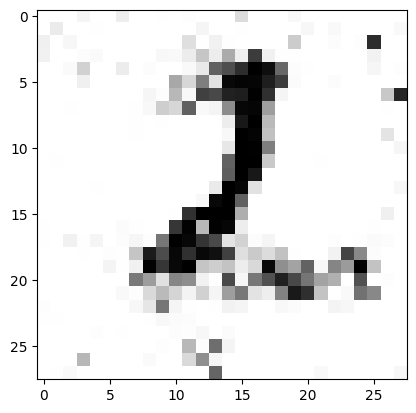

"\n#Uncomment to run this part of the code to gen multiple images....\n##############################################\n\n# example of loading the generator model and generating images\nfrom keras.models import load_model\nfrom numpy.random import randn\nfrom matplotlib import pyplot as plt\n\n\n# generate points in latent space as input for the generator\ndef generate_latent_points(latent_dim, n_samples):\n\t# generate points in the latent space\n\tx_input = randn(latent_dim * n_samples)\n\t# reshape into a batch of inputs for the network\n\tx_input = x_input.reshape(n_samples, latent_dim)\n\treturn x_input\n\n# create and save a plot of generated images (reversed grayscale)\ndef save_plot(examples, n):\n\t# plot images\n\tfor i in range(n * n):\n\t\t# define subplot\n\t\tplt.subplot(n, n, 1 + i)\n\t\t# turn off axis\n\t\tplt.axis('off')\n\t\t# plot raw pixel data\n\t\tplt.imshow(examples[i, :, :, 0], cmap='gray_r')\n\tplt.show()\n\n# load model\nmodel = load_model('generator_model_100

In [ ]:
#FOr single image
# example of generating an image for a specific point in the latent space
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
from numpy.random import randn

# load model
model = load_model('generator_model.h5')

#To create same image, suppy same vector each time
# all 0s
#vector = asarray([[0. for _ in range(100)]])  #Vector of all zeros

#To create random images each time...
vector = randn(100) #Vector of random numbers (creates a column, need to reshape)
vector = vector.reshape(1, 100)

# generate image
X = model.predict(vector)

# plot the result
pyplot.imshow(X[0, :, :, 0], cmap='gray_r')
pyplot.show()

"""
#Uncomment to run this part of the code to gen multiple images....
##############################################

# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot as plt


# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		plt.subplot(n, n, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(examples[i, :, :, 0], cmap='gray_r')
	plt.show()

# load model
model = load_model('generator_model_100K.h5')
# generate images
#Generate 16 images, each image provide a vector of size 100 as input
latent_points = generate_latent_points(100, 16)
# generate images
X = model.predict(latent_points)
# plot the result
save_plot(X, 4)  #Plot 4x4 grid (Change to 5 if generating 25 images)

"""
